In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.svm import SVC 

In [247]:
# Dataset
data=pd.read_csv("C://vit//ml//project//all.csv")
X=data.drop('target',axis=1)
y=data['target']

In [248]:
#split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state=122)

In [249]:
#PRE_PROCESSING
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
class_weight = {1: 5.66, 2:8.7 , 3:1}
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [250]:
# LOGISTIC REGRESSION
model = LogisticRegression(solver = 'liblinear',max_iter=1000,multi_class='ovr',class_weight=class_weight)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={1: 5.66, 2: 8.7, 3: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

With logistic regression

Misclassified samples: 33
Accuracy: 0.776


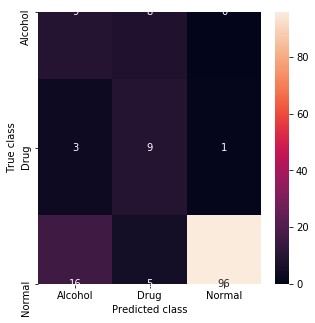

[[ 9  8  0]
 [ 3  9  1]
 [16  5 96]]


In [251]:
print('With logistic regression\n')
# use the model to make predictions with the test data
lr_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != lr_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, lr_pred)
print('Accuracy: {:.3f}'.format(accuracy))
cm = confusion_matrix(y_test, lr_pred)
LABELS = ['Alcohol', 'Drug','Normal']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(cm)

In [252]:
# SVM
model = SVC(kernel='rbf',class_weight=class_weight)
model.fit(X_train, y_train)

c:\users\akanksha\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight={1: 5.66, 2: 8.7, 3: 1}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

With SVM

Misclassified samples: 28
Accuracy: 0.810


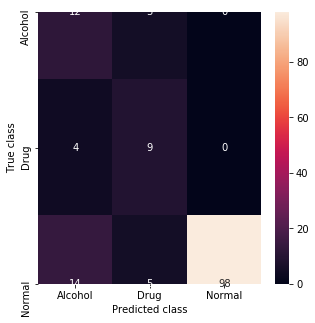

[[12  5  0]
 [ 4  9  0]
 [14  5 98]]


In [253]:
print('With SVM\n')
# use the model to make predictions with the test data
svm_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != svm_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, svm_pred)
print('Accuracy: {:.3f}'.format(accuracy))
cm = confusion_matrix(y_test, svm_pred)
LABELS = ['Alcohol', 'Drug','Normal']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(cm)

In [254]:
print('Logistic SCORES\n')
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, lr_pred,average='weighted')
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, lr_pred,average='weighted')
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, lr_pred,average='weighted')
print('F1 score: %.3f' % f1)
print('\n\nSVM SCORES\n')
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, svm_predictions,average='weighted')
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, svm_predictions,average='weighted')
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, svm_predictions,average='weighted')
print('F1 score: %.3f' % f1)

Logistic SCORES

Precision: 0.861
Recall: 0.776
F1 score: 0.806


SVM SCORES

Precision: 0.646
Recall: 0.490
F1 score: 0.543


In [255]:
from sklearn.metrics import classification_report
print("SVM\n\n")
cr=classification_report(y_test,svm_pred)
print(cr)
print("\n\n")
print("LOGISTIC\n\n")
cr=classification_report(y_test,lr_pred)
print(cr)

SVM


              precision    recall  f1-score   support

           1       0.40      0.71      0.51        17
           2       0.47      0.69      0.56        13
           3       1.00      0.84      0.91       117

    accuracy                           0.81       147
   macro avg       0.62      0.75      0.66       147
weighted avg       0.88      0.81      0.83       147




LOGISTIC


              precision    recall  f1-score   support

           1       0.32      0.53      0.40        17
           2       0.41      0.69      0.51        13
           3       0.99      0.82      0.90       117

    accuracy                           0.78       147
   macro avg       0.57      0.68      0.60       147
weighted avg       0.86      0.78      0.81       147

